In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib notebook

Test data

In [2]:
filename='radial_profile_data/test_2_circles.tif'

In [3]:
data_1 = plt.imread(filename, 1)
data_1 = np.array(data_1[:,:,0])

In [4]:
np.shape(data_1)

(1000, 1000)

In [5]:
data = np.array(Image.open(filename))
data = data[:,:,1]

<IPython.core.display.Javascript object>


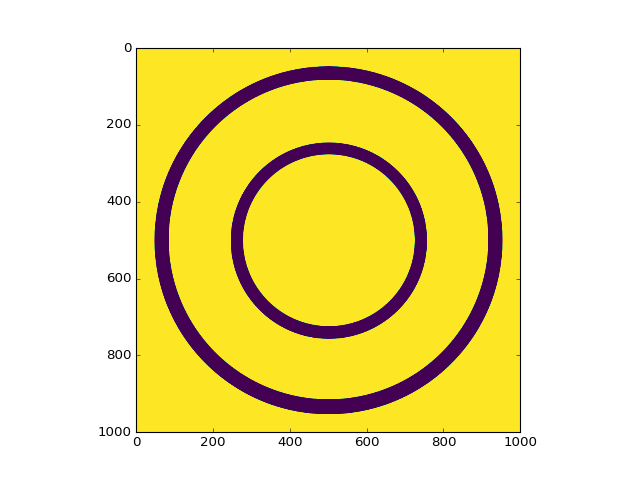

In [6]:
plt.figure(0)
plt.imshow(data, cmap='viridis')

Determine center of circles

In [7]:
[height, width] = np.shape(data)
[y0, x0] = [int(height/2), int(width)/2]

Radial profile algorithm

In [8]:
def radial_profile(data, center):
    y,x = np.indices((data.shape)) # first determine radii of all pixels
    r = np.sqrt((x-center[0])**2+(y-center[1])**2)
    ind = np.argsort(r.flat) # get sorted indices
    sr = r.flat[ind] # sorted radii
    sim = data.flat[ind] # image values sorted by radii
    ri = sr.astype(np.int32) # integer part of radii (bin size = 1)
    # determining distance between changes
    deltar = ri[1:] - ri[:-1] # assume all radii represented
    rind = np.where(deltar)[0] # location of changed radius
    nr = rind[1:] - rind[:-1] # number in radius bin
    csim = np.cumsum(sim, dtype=np.float64) # cumulative sum to figure out sums for each radii bin
    tbin = csim[rind[1:]] - csim[rind[:-1]] # sum for image values in radius bins
    radialprofile = tbin/nr # the answer
    return radialprofile

def radial_profile_2(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

In [38]:
rad = radial_profile_2(data, [y0, x0])

In [39]:
np.shape(rad)

(708,)

<IPython.core.display.Javascript object>


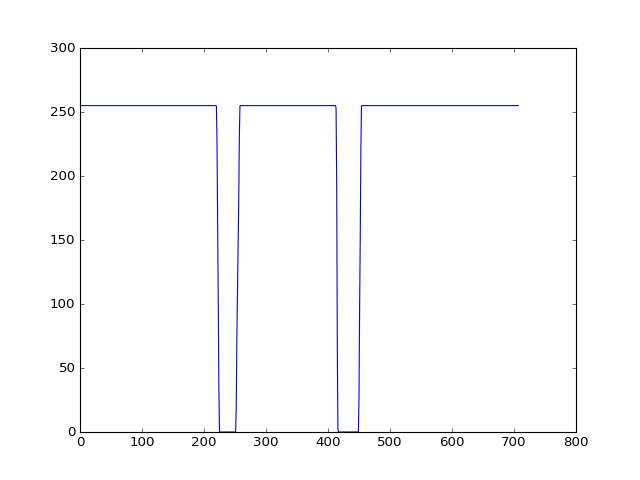

In [40]:
plt.figure(1)
plt.plot(rad)